In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.optimize as sco
import scipy.constants as c
from scipy.optimize import curve_fit as curce_fit
import pandas as pd

def degtorad(deg):
    return(deg/180*np.pi)

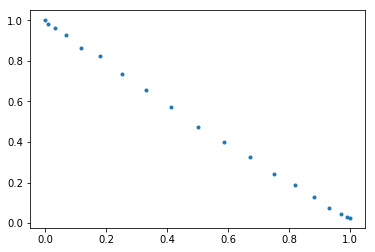

In [2]:
#Als erstes mal die Linearität der Fotodiode Prüfen
data=pd.read_table("Data/Polarisation.txt",skiprows=2)
data

angle=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
intens=intens/np.max(intens)
fig,ax=plt.subplots()
ax.plot(np.sin(degtorad(angle))**2,intens,".")

In [3]:
def dirac(wavelen,T,E_F):
    E=c.h * c.c / wavelen /c.e
    return 500/ ( np.exp((E-E_F)/8.6e-5 /T) -1 ) # k_B in eV
def diracE(E,T,E_F):
    return 1/ ( np.exp((E-E_F)/c.k/T) -1 ) 

def heavi(x,A,b,c):
    return A * (np.sign(x-b) + c) # A=amp/2 , b=Eg in nm

def expon(x,A,E_g):
    E=c.h * c.c / x /c.e
    return A * np.exp(E/E_g)
def linearfit(linf,x,y,m,b,ymin,ymax):
    """Returns popt,pcov,relevantx,relevanty"""
    tempx=[]
    tempy=[]
    #hier werden die Daten ausgewählt die im richtigen y interval sind
    for i in range(len(y)):
        if(ymin<y[i] and y[i]<ymax):
            tempx.append(x[i])
            tempy.append(y[i])
    popt,pcov=curce_fit(linf,tempx,tempy,p0=(m,b))
    return popt,pcov,tempx,tempy

C:\Users\Gunther\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


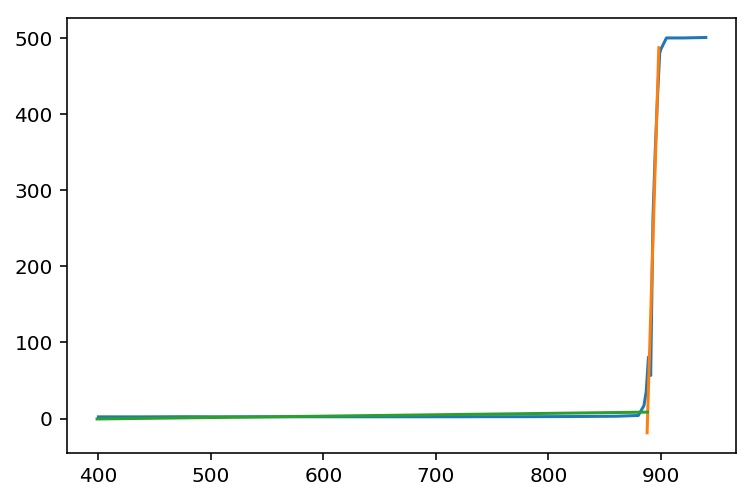

In [4]:

data=[]
data.append( pd.read_csv("Data/{}.txt".format("Links"),delimiter="\t",skiprows=1 ))
wavelen, intens =[],[]
for entry in data:
    wavelen= entry.values[:,0]
    intens = entry.values[:,1]
    

wavelen=np.array(wavelen)

#Als erstes nur die interessanten werte betrachten, also ab 950nm cutten
relwavelen=[]
for x in wavelen:
    if(x<950):
        relwavelen.append(x)
relintens=intens[0:len(relwavelen)]

fig, ax = plt.subplots(dpi=144)

#Data plot
ax.plot(relwavelen,relintens)

#Fit Steigung
linf=lambda x,m,b:m*x+b
popt,pcov,tempx,tempy=linearfit(linf,relwavelen,relintens,10,40,40,450)
extension=1.2
mylin=np.linspace(min(tempx)-extension,max(tempx)+extension)
ax.plot(mylin, linf(mylin,*popt))

#Fit Gerade
#Fit
linf=lambda x,m,b:m*x+b
popt,pcov,tempx,tempy=linearfit(linf,relwavelen,relintens,10,40,0,40)
extension=1.2
mylin=np.linspace(min(tempx)-extension,max(tempx)+extension)
ax.plot(mylin, linf(mylin,*popt))
ax.legend();


In [5]:
def plotXY(ax,filename,skiprows,label):
    data=pd.read_table(filename,skiprows=skiprows)
    angle=np.array(data.values[:,0])
    intens=np.array(data.values[:,1])
 
    ax.plot(angle,intens,label=label)

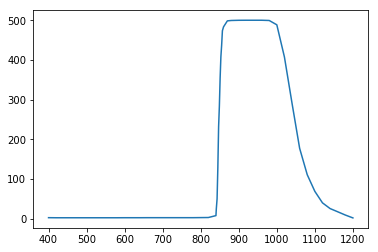

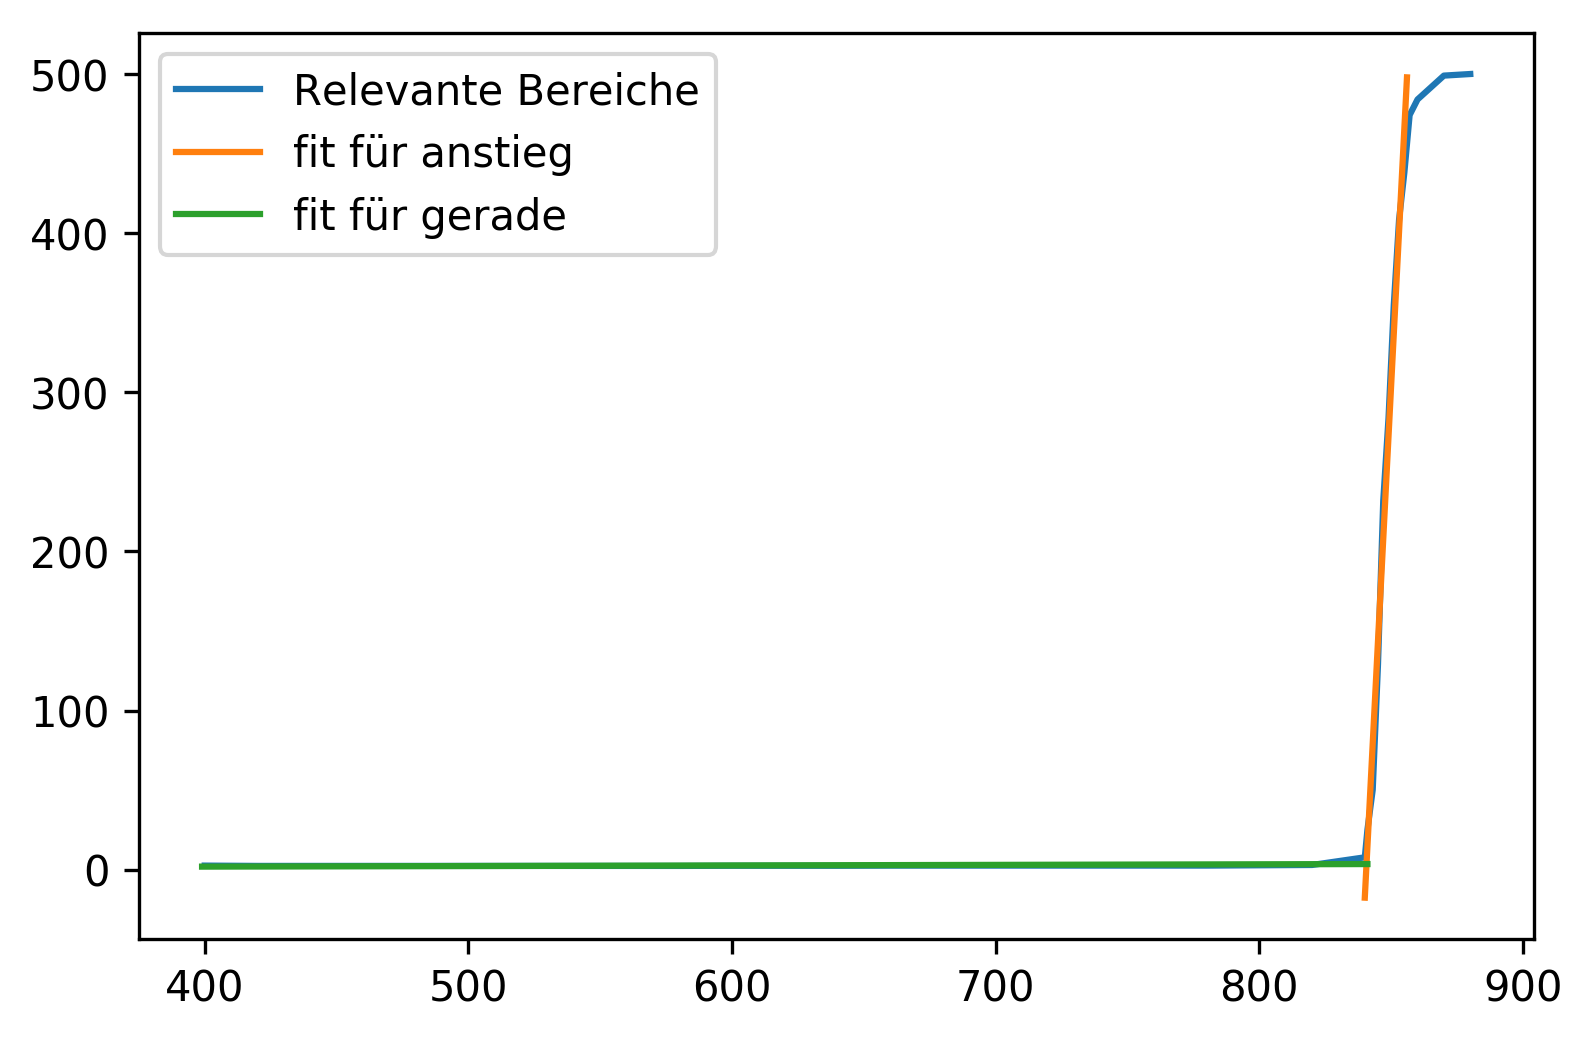

In [6]:
fig,ax=plt.subplots()
plotXY(ax,"Data/LinksN2.txt",2,"Gesamte Links N2")
data=pd.read_table("Data/LinksN2.txt",skiprows=2)
angle=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
#Den hinteren teil abschneiden
fig,ax=plt.subplots(dpi=300)
relangle=[]
for x in angle:
    if(x<900):
        relangle.append(x)
relintens=intens[:len(relangle)]
ax.plot(relangle,relintens,label="Relevante Bereiche")
#Fit des Anstiegs
func=lambda x,m,b:m*x+b
popt,pcov,xplot,yplot=linearfit(func,relangle,relintens,10,800,20,450)
mylin=np.linspace(min(xplot)-1,max(xplot)+1,1000)
ax.plot(mylin,func(mylin,*popt),label="fit für anstieg")
#Fit der geraden bis 800nm
popt,pcov,xplot,yplot=linearfit(func,relangle,relintens,0,0,0,20)
mylin=np.linspace(min(xplot)-1,max(xplot)+1,1000)
ax.plot(mylin,func(mylin,*popt),label="fit für gerade")
ax.legend()

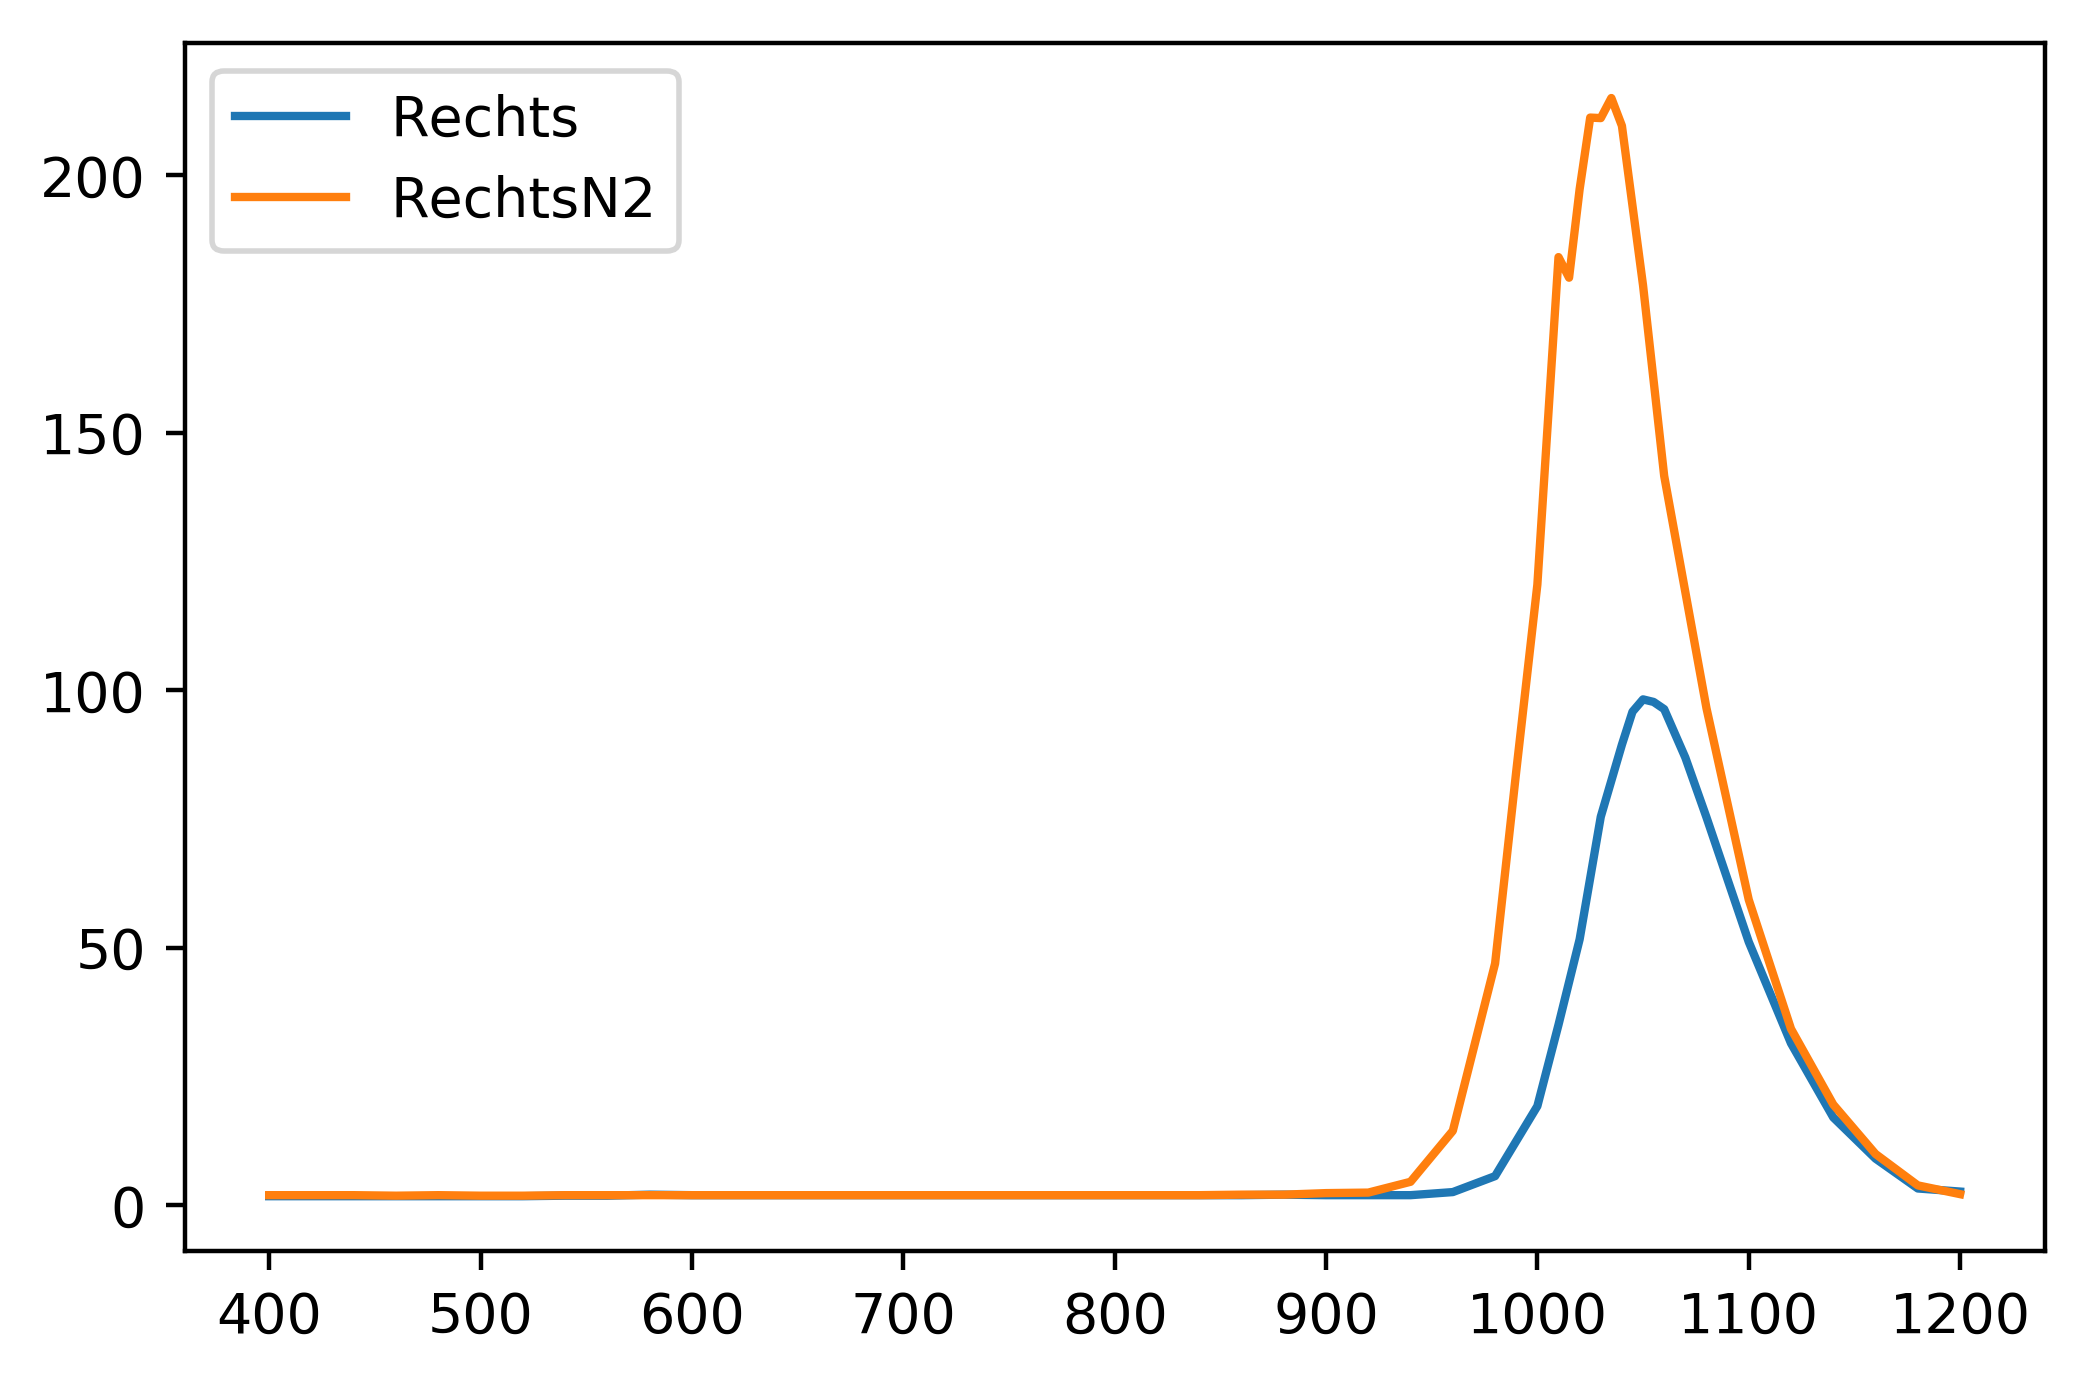

In [7]:
fig,ax=plt.subplots(dpi=400)
plotXY(ax,"Data/Rechts.txt",2,"Rechts")
plotXY(ax,"Data/RechtsN2.txt",2,"RechtsN2")
#plotXY(ax,"Data/Links.txt",2,"Links")
#plotXY(ax,"Data/LinksN2.txt",2,"LinksN2")
#ax.semilogy()
ax.legend()

In [26]:
def indFit(wl,Eg,Ep,A,T=300):
    wl=wl*1e-9
    h_nu= c.h*c.c /wl /c.e
    return A *((h_nu - Eg + Ep)**2/ ( np.exp(Ep/c.Boltzmann/c.e / T) -1) + (h_nu - Eg - Ep)**2/ ( 1- np.exp(-Ep/c.Boltzmann/c.e / T) ))

C:\Users\Gunther\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


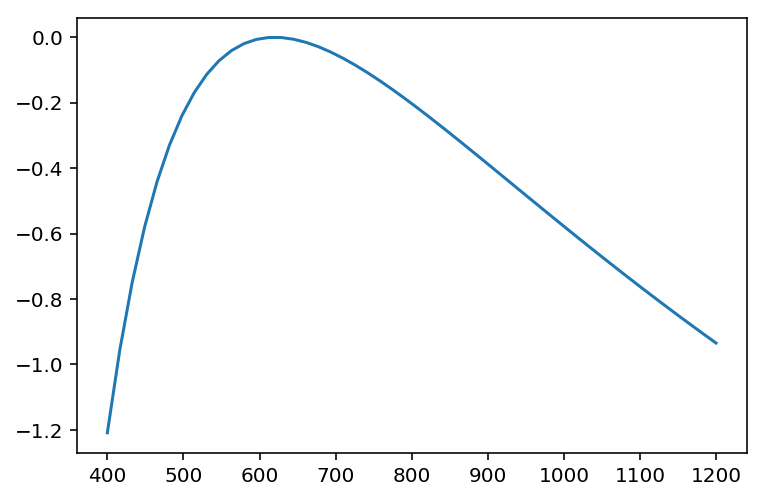

In [29]:
#popt,pcov=cf(ind Fit)

d=np.linspace(400,1200)
fig,ax=plt.subplots(dpi=144)
ax.plot(d, indFit(d, 1.7, 0.3,1))
#ax.set(yscale="log")